Analyze the data available to us

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [51]:
# Load the dataset
df = pd.read_csv("wine_data.csv")

In [52]:
df

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@kerinokeefe,Italy,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia,White Blend
1,@vossroger,Portugal,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos,Portuguese Red
2,@paulgwine,US,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm,Pinot Gris
3,NaN,US,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian,Riesling
4,@paulgwine,US,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks,Pinot Noir
...,...,...,...,...,...,...,...,...,...,...,...,...
103317,NaN,Germany,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Dr. H. Thanisch (Erben Müller-Burggraef),Riesling
103318,@paulgwine,US,Citation 2004 Pinot Noir (Oregon),Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Citation,Pinot Noir
103319,@vossroger,France,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser,Gewürztraminer
103320,@vossroger,France,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Domaine Marcel Deiss,Pinot Gris


In [53]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check the data types of the columns
print("\nData types of the columns:\n", df.dtypes)

# Check the summary statistics of the numeric columns
print("\nSummary statistics of the numeric columns:\n", df.describe())

# Check the number of missing values in each column
print("\nNumber of missing values in each column:\n", df.isnull().sum())

# Check the unique values of each column
for column in df.columns:
    print("\nUnique values of {}:\n".format(column), df[column].unique())

Shape of the dataset: (103322, 12)

Data types of the columns:
 user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

Summary statistics of the numeric columns:
               points         price
count  103322.000000  96359.000000
mean       88.540630     36.781224
std         3.090903     42.867069
min        80.000000      4.000000
25%        86.000000     18.000000
50%        88.000000     27.000000
75%        91.000000     45.000000
max       100.000000   3300.000000

Number of missing values in each column:
 user_name             24131
country                  39
review_title              0
review_description        0
designation           29636
points             

Visualize the parameters to understand more about the business

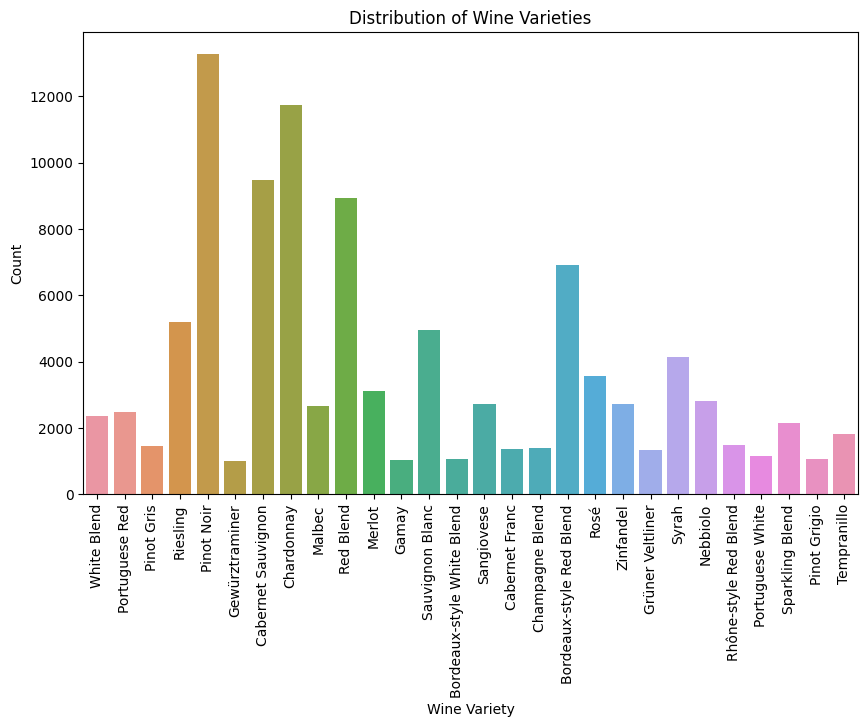

In [54]:
# Check the distribution of wine varieties
plt.figure(figsize=(10, 6))
sns.countplot(x="variety", data=df)
plt.title("Distribution of Wine Varieties")
plt.xlabel("Wine Variety")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

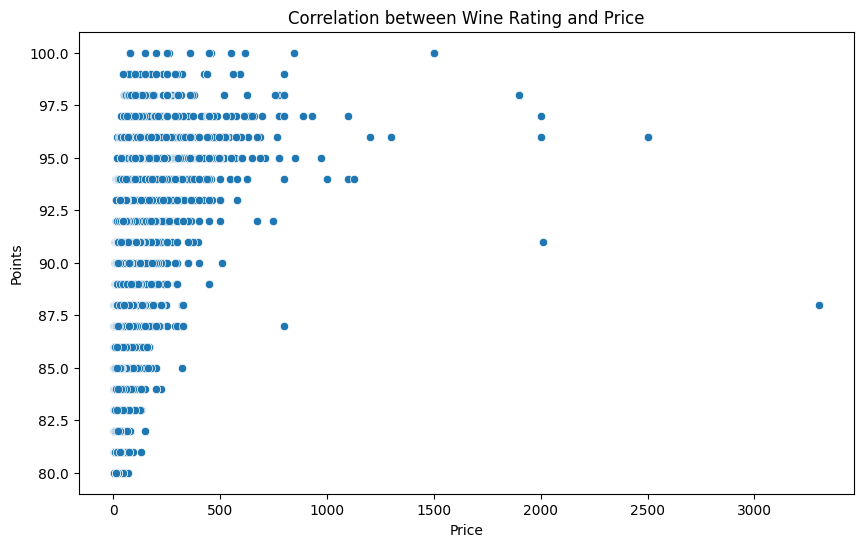

In [55]:
# Check the correlation between wine rating and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="points", data=df)
plt.title("Correlation between Wine Rating and Price")
plt.xlabel("Price")
plt.ylabel("Points")
plt.show()

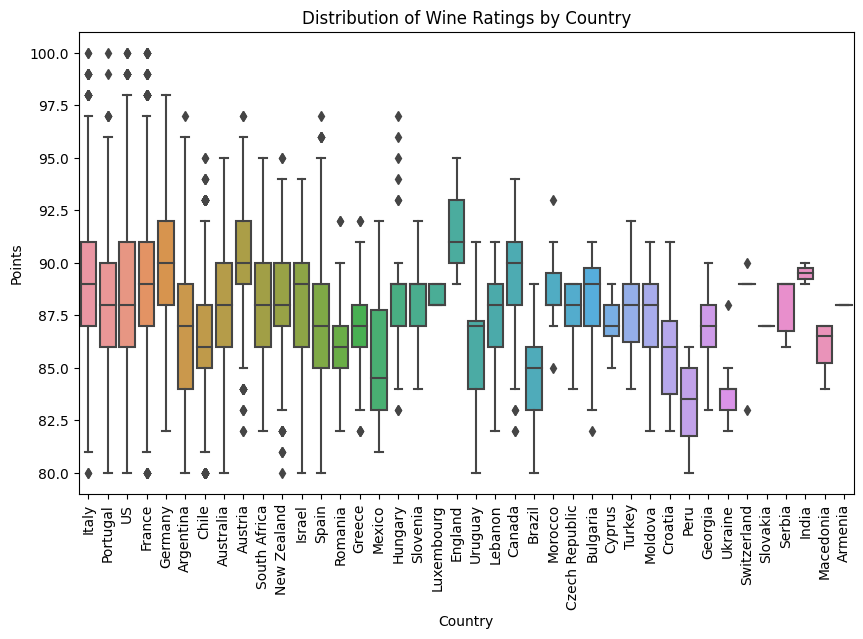

In [56]:
# Check the distribution of wine ratings by country
plt.figure(figsize=(10, 6))
sns.boxplot(x="country", y="points", data=df)
plt.title("Distribution of Wine Ratings by Country")
plt.xlabel("Country")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()


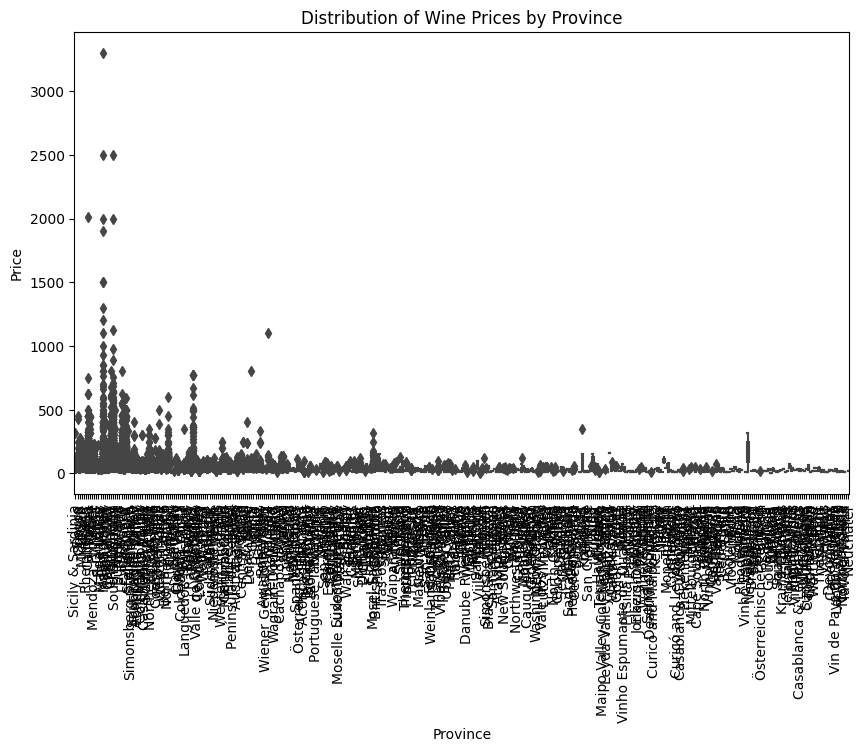

In [57]:
# Check the distribution of wine prices by province
plt.figure(figsize=(10, 6))
sns.boxplot(x="province", y="price", data=df)
plt.title("Distribution of Wine Prices by Province")
plt.xlabel("Province")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

In [58]:
# Top 5 wine varieties by count
top_5_varieties = df['variety'].value_counts().nlargest(5)
print("\nTop 5 wine varieties by count:\n", top_5_varieties)

# Average price of top 5 wine varieties
avg_price_by_variety = df.groupby('variety')['price'].mean().nlargest(5)
print("\nAverage price of top 5 wine varieties:\n", avg_price_by_variety)

# Top 5 countries by number of wine reviews
top_5_countries = df['country'].value_counts().nlargest(5)
print("\nTop 5 countries by number of wine reviews:\n", top_5_countries)

# Average rating by price range
df['price_range'] = pd.cut(df['price'], bins=[0, 25, 50, 100, 1000], labels=['<25', '25-50', '50-100', '100+'])
avg_rating_by_price_range = df.groupby('price_range')['points'].mean()
print("\nAverage rating by price range:\n", avg_rating_by_price_range)

# Percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
print("\nPercentage of missing values in each column:\n", percent_missing)



Top 5 wine varieties by count:
 Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64

Average price of top 5 wine varieties:
 variety
Champagne Blend             70.744839
Nebbiolo                    65.609610
Cabernet Sauvignon          47.940017
Pinot Noir                  47.528897
Bordeaux-style Red Blend    47.210861
Name: price, dtype: float64

Top 5 countries by number of wine reviews:
 US          48153
France      19932
Italy       11370
Portugal     4038
Chile        3630
Name: country, dtype: int64

Average rating by price range:
 price_range
<25       86.884802
25-50     89.286315
50-100    91.056851
100+      92.834932
Name: points, dtype: float64

Percentage of missing values in each column:
 user_name             23.355142
country                0.037746
review_title           0.000000
review_description     0.000000
designatio

Build a model to predict the variety of the wine

In [59]:

# Load the dataset
data = pd.read_csv("wine_data.csv")

# Drop irrelevant columns
data.drop(["user_name", "country", "review_title", "review_description", "designation", "province", "region_1", "region_2", "winery"], axis=1, inplace=True)

# Drop missing values
data.dropna(inplace=True)

# Split the data into features and target
X = data.drop("variety", axis=1)
y = data["variety"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [60]:
# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.16832710668327105


In [61]:
# Load the dataset
data = pd.read_csv("wine_data.csv")

# Drop irrelevant columns
data.drop(["user_name", "country", "review_title", "review_description", "designation", "province", "region_1", "region_2", "winery"], axis=1, inplace=True)

# Drop missing values
data.dropna(inplace=True)

# Split the data into features and target
X = data.drop("variety", axis=1)
y = data["variety"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.16832710668327105


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('wine_data.csv')

# Drop rows with missing values in the 'variety' column
data.dropna(subset=['variety'], inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Preprocess the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['review_description'])
X_test = vectorizer.transform(test_data['review_description'])

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, train_data['variety'])

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(test_data['variety'], y_pred)
print(f"Accuracy: {accuracy*100}%")


Accuracy: 44.655214130171785%


In [65]:
import joblib

# Save the model
joblib.dump(clf, "wine-variety-predictor.joblib")


['wine-variety-predictor.joblib']

Use Neural Network to train the data accuracy about 68%

In [66]:


# Load the data
df = pd.read_csv("wine_data.csv", usecols=["variety", "review_description"])

# Preprocess the data
max_seq_len = 100
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["review_description"])
X = tokenizer.texts_to_sequences(df["review_description"])
X = pad_sequences(X, maxlen=max_seq_len)
y = pd.get_dummies(df["variety"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=num_words, output_dim=100, input_length=max_seq_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(y.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
epochs = 10
batch_size = 128
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


2023-05-11 10:52:32.831327: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 10:52:33.070948: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 10:52:33.072539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 10:52:34.379900: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/10


2023-05-11 10:52:39.904478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-11 10:52:39.904927: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-11 10:52:39.977896: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33062800 exceeds 10% of free system memory.


646/646 [==============================] - 24s 37ms/step - loss: 1.6865 - accuracy: 0.4895 - val_loss: 1.1579 - val_accuracy: 0.6380
Epoch 2/10
646/646 [==============================] - 23s 36ms/step - loss: 0.8371 - accuracy: 0.7418 - val_loss: 1.0285 - val_accuracy: 0.6823
Epoch 3/10
646/646 [==============================] - 23s 36ms/step - loss: 0.4664 - accuracy: 0.8601 - val_loss: 1.0961 - val_accuracy: 0.6867
Epoch 4/10
646/646 [==============================] - 23s 36ms/step - loss: 0.2015 - accuracy: 0.9485 - val_loss: 1.2948 - val_accuracy: 0.6797
Epoch 5/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0676 - accuracy: 0.9877 - val_loss: 1.4877 - val_accuracy: 0.6731
Epoch 6/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0193 - accuracy: 0.9988 - val_loss: 1.6765 - val_accuracy: 0.6735
Epoch 7/10
646/646 [==============================] - 23s 36ms/step - loss: 0.0070 - accuracy: 0.9999 - val_loss: 1.8051 - val_accuracy: 0.6717
Epo

In [67]:
import joblib

# Save the model
joblib.dump(model, "wine-variety-predictor.joblib")


['wine-variety-predictor.joblib']